In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
pd.options.display.max_columns=None
pd.options.display.max_rows=None
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df

Country  Year      Status  \
0                                           Afghanistan  2015  Developing   
1                                           Afghanistan  2014  Developing   
2                                           Afghanistan  2013  Developing   
3                                           Afghanistan  2012  Developing   
4                                           Afghanistan  2011  Developing   
5                                           Afghanistan  2010  Developing   
6                                           Afghanistan  2009  Developing   
7                                           Afghanistan  2008  Developing   
8                                           Afghanistan  2007  Developing   
9                                           Afghanistan  2006  Developing   
10                                          Afghanistan  2005  Developing   
11                                          Afghanistan  2004  Developing   
12                                          Afghanistan  2003  Developing   
13                                          Afghanistan  2002  Developing   
14                                          Afghanistan  2001  Developing   
15                                          Afghanistan  2000  Developing   
16                                              Albania  2015  Developing   
17                                              Albania  2014  Developing   
18                                              Albania  2013  Developing   
19                                              Albania  2012  Developing   
20                                              Albania  2011  Developing   
21                                              Albania  2010  Developing   
22                                              Albania  2009  Developing   
23                                              Albania  2008  Developing   
24                                              Albania  2007  Developing   
25                                              Albania  2006  Developing   
26                                              Albania  2005  Developing   
27                                              Albania  2004  Developing   
28                                              Albania  2003  Developing   
29                                              Albania  2002  Developing   
30                                              Albania  2001  Developing   
31                                              Albania  2000  Developing   
32                                              Algeria  2015  Developing   
33                                              Algeria  2014  Developing   
34                                              Algeria  2013  Developing   
35                                              Algeria  2012  Developing   
36                                              Algeria  2011  Developing   
37                                              Algeria  2010  Developing   
38                                              Algeria  2009  Developing   
39                                              Algeria  2008  Developing   
40                                              Algeria  2007  Developing   
41                                              Algeria  2006  Developing   
42                                              Algeria  2005  Developing   
43                                              Algeria  2004  Developing   
44                                              Algeria  2003  Developing   
45                                              Algeria  2002  Developing   
46                                              Algeria  2001  Developing   
47                                              Algeria  2000  Developing   
48                                               Angola  2015  Developing   
49                                               Angola  2014  Developing   
50                                               Angola  2013  Developing   
51                                          

In [3]:
df.to_excel('DataSet.xlsx')

In [4]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
df['Population'].fillna((df['Population'].mean()), inplace=True)
df['Adult Mortality'].fillna((df['Adult Mortality'].mean()), inplace=True)
df['infant deaths'].fillna((df['infant deaths'].mean()), inplace=True)
df['GDP'].fillna((df['GDP'].mean()), inplace=True)
df['Schooling'].fillna((df['Schooling'].mean()), inplace=True)
df['percentage expenditure'].fillna((df['percentage expenditure'].mean()), inplace=True)
df['Life expectancy '].fillna((df['Life expectancy '].mean()), inplace=True)
df['Alcohol'].fillna((df['Alcohol'].mean()), inplace=True)

In [6]:
df[['Population','Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']].describe()

Population  Adult Mortality  infant deaths            GDP  \
count  2.938000e+03      2938.000000    2938.000000    2938.000000   
mean   1.275338e+07       164.796448      30.303948    7483.158469   
std    5.381546e+07       124.080302     117.926501   13136.800417   
min    3.400000e+01         1.000000       0.000000       1.681350   
25%    4.189172e+05        74.000000       0.000000     580.486996   
50%    3.675929e+06       144.000000       3.000000    3116.561755   
75%    1.275338e+07       227.000000      22.000000    7483.158469   
max    1.293859e+09       723.000000    1800.000000  119172.741800   

         Schooling  percentage expenditure  Life expectancy       Alcohol  
count  2938.000000             2938.000000       2938.000000  2938.000000  
mean     11.992793              738.251295         69.224932     4.602861  
std       3.264381             1987.914858          9.507640     3.916288  
min       0.000000                0.000000         36.300000     0.010000  
25%      10.300000                4.685343         63.200000     1.092500  
50%      12.100000               64.912906         72.000000     4.160000  
75%      14.100000              441.534144         75.600000     7.390000  
max      20.700000            19479.911610         89.000000    17.870000

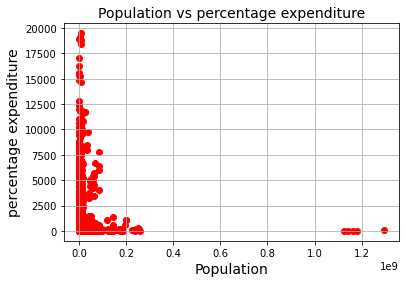

In [7]:
plt.scatter(df['Population'],df['percentage expenditure'], color = 'red')
plt.title("Population vs percentage expenditure", fontsize = 14)
plt.xlabel('Population',fontsize = 14)
plt.ylabel('percentage expenditure', fontsize = 14)
plt.grid(True)
plt.show()

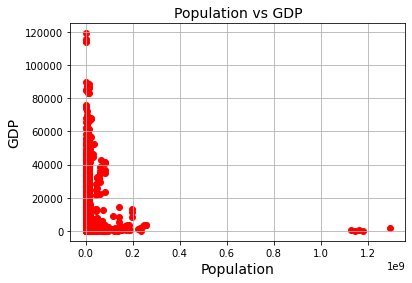

In [8]:
plt.scatter(df['Population'],df['GDP'], color = 'red')
plt.title("Population vs GDP", fontsize = 14)
plt.xlabel('Population',fontsize = 14)
plt.ylabel('GDP', fontsize = 14)
plt.grid(True)
plt.show()

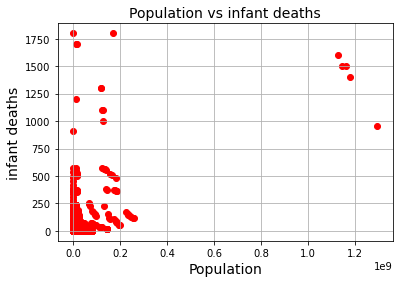

In [9]:
plt.scatter(df['Population'],df['infant deaths'], color = 'red')
plt.title("Population vs infant deaths", fontsize = 14)
plt.xlabel('Population',fontsize = 14)
plt.ylabel('infant deaths', fontsize = 14)
plt.grid(True)
plt.show()

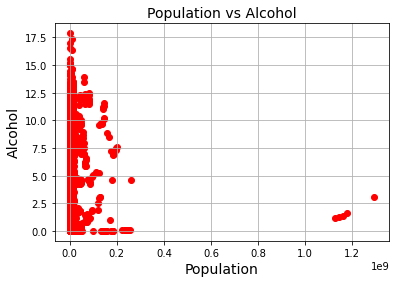

In [10]:
plt.scatter(df['Population'],df['Alcohol'], color = 'red')
plt.title("Population vs Alcohol", fontsize = 14)
plt.xlabel('Population',fontsize = 14)
plt.ylabel('Alcohol', fontsize = 14)
plt.grid(True)
plt.show()

Below will be correlation matrix

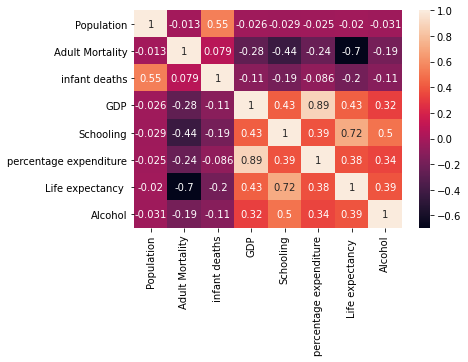

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt


correlation_mat = df[['Population','Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']].corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

Next move is creation of regression

In [12]:
Y = df['Population']
X = df[['Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']]

In [13]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression()

In [14]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -34588073.16544979
Coefficients: 
 [ 4.86730968e+03  2.59562516e+05  8.44334828e+01  5.44248649e+05
 -9.04724718e+02  4.72407562e+05 -1.12928368e+05]


In [15]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          1.72e-230
Time:                        07:49:18   Log-Likelihood:                -55923.
No. Observations:                2938   AIC:                         1.119e+05
Df Residuals:                    2930   BIC:                         1.119e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.45

Let's convert DataFRame to multi-index DataFrame

In [16]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
#add column year to index
df = df.set_index('Year', append=True)
#swap indexes
df.index = df.index.swaplevel(0,1)
print(df.head())

                  Country      Status  Life expectancy   Adult Mortality  \
Year                                                                       
2015-01-01 0  Afghanistan  Developing              65.0            263.0   
2014-01-01 1  Afghanistan  Developing              59.9            271.0   
2013-01-01 2  Afghanistan  Developing              59.9            268.0   
2012-01-01 3  Afghanistan  Developing              59.5            272.0   
2011-01-01 4  Afghanistan  Developing              59.2            275.0   

              infant deaths  Alcohol  percentage expenditure  Hepatitis B  \
Year                                                                        
2015-01-01 0             62     0.01               71.279624         65.0   
2014-01-01 1             64     0.01               73.523582         62.0   
2013-01-01 2             66     0.01               73.219243         64.0   
2012-01-01 3             69     0.01               78.184215         67.0   
2011-

In [17]:
from linearmodels import RandomEffects
Y1 = df['Population']

re = RandomEffects(Y1, df[['Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']])
print(re.fit(cov_type = 'clustered', clustered_entity = True))

                        RandomEffects Estimation Summary                        
Dep. Variable:             Population   R-squared:                        0.3440
Estimator:              RandomEffects   R-squared (Between):              0.9395
No. Observations:                2938   R-squared (Within):               0.3085
Date:                Wed, Jan 20 2021   R-squared (Overall):              0.3440
Time:                        07:49:20   Log-likelihood                -5.593e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      219.61
Entities:                          16   P-value                           0.0000
Avg Obs:                       183.62   Distribution:                  F(7,2931)
Min Obs:                       183.00                                           
Max Obs:                       193.00   F-statistic (robust):             111.56
                            

In [18]:
from linearmodels.panel import PanelOLS
mod = PanelOLS(df['Population'], df[['Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']], entity_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res.params)

Adult Mortality           -18782.902666
infant deaths             255368.195895
GDP                          124.095110
Schooling                 752473.683690
percentage expenditure      -873.714057
Life expectancy           -13675.654197
Alcohol                    -7277.836270
Name: parameter, dtype: float64


In [19]:
from linearmodels import PanelOLS
fe_mod = PanelOLS(df['Population'],sm.add_constant(df[['Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']]), entity_effects=True)
fe_res = fe_mod.fit(cov_type='clustered', cluster_entity=True)
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Population   R-squared:                        0.3110
Estimator:                   PanelOLS   R-squared (Between):             -0.0773
No. Observations:                2938   R-squared (Within):               0.3110
Date:                Wed, Jan 20 2021   R-squared (Overall):              0.3097
Time:                        07:49:22   Log-likelihood                -5.592e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      187.97
Entities:                          16   P-value                           0.0000
Avg Obs:                       183.62   Distribution:                  F(7,2915)
Min Obs:                       183.00                                           
Max Obs:                       193.00   F-statistic (robust):             12.151
                            

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(df[['Population','Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']])

variables        VIF
0              Population   1.524480
1         Adult Mortality   2.370267
2           infant deaths   1.569348
3                     GDP   6.595013
4               Schooling  33.744588
5  percentage expenditure   5.497802
6        Life expectancy   31.732579
7                 Alcohol   3.259980

After the following line I removed Life expectancy and Schooling

In [21]:
df[['Population','Adult Mortality','infant deaths','GDP','percentage expenditure','Alcohol']]

Population  Adult Mortality  infant deaths            GDP  \
Year                                                                           
2015-01-01 0     3.373649e+07       263.000000             62     584.259210   
2014-01-01 1     3.275820e+05       271.000000             64     612.696514   
2013-01-01 2     3.173169e+07       268.000000             66     631.744976   
2012-01-01 3     3.696958e+06       272.000000             69     669.959000   
2011-01-01 4     2.978599e+06       275.000000             71      63.537231   
2010-01-01 5     2.883167e+06       279.000000             74     553.328940   
2009-01-01 6     2.843310e+05       281.000000             77     445.893298   
2008-01-01 7     2.729431e+06       287.000000             80     373.361116   
2007-01-01 8     2.661679e+07       295.000000             82     369.835796   
2006-01-01 9     2.589345e+06       295.000000             84     272.563770   
2005-01-01 10    2.577980e+05       291.000000             85      25.294130   
2004-01-01 11    2.411898e+07       293.000000             87     219.141353   
2003-01-01 12    2.364851e+06       295.000000             87     198.728544   
2002-01-01 13    2.197992e+07         3.000000             88     187.845950   
2001-01-01 14    2.966463e+06       316.000000             88     117.496980   
2000-01-01 15    2.937560e+05       321.000000             88     114.560000   
2015-01-01 16    2.887300e+04        74.000000              0    3954.227830   
2014-01-01 17    2.889140e+05         8.000000              0    4575.763787   
2013-01-01 18    2.895920e+05        84.000000              0    4414.723140   
2012-01-01 19    2.941000e+03        86.000000              0    4247.614380   
2011-01-01 20    2.951950e+05        88.000000              0    4437.178680   
2010-01-01 21    2.913210e+05        91.000000              1     494.358832   
2009-01-01 22    2.927519e+06        91.000000              1    4114.136545   
2008-01-01 23    2.947314e+06         1.000000              1     437.539647   
2007-01-01 24    2.971700e+04         9.000000              1     363.136850   
2006-01-01 25    2.992547e+06        99.000000              1      35.129300   
2005-01-01 26    3.114870e+05        15.000000              1     279.142931   
2004-01-01 27    3.269390e+05        17.000000              1    2416.588235   
2003-01-01 28    3.396160e+05        18.000000              1     189.681557   
2002-01-01 29    3.511000e+03        15.000000              1    1453.642777   
2001-01-01 30    3.617300e+04        14.000000              1    1326.973390   
2000-01-01 31    3.892700e+04        11.000000              1    1175.788981   
2015-01-01 32    3.987153e+07        19.000000             21    4132.762920   
2014-01-01 33    3.911331e+07        11.000000             21     547.851700   
2013-01-01 34    3.833856e+07       112.000000             21    5471.866766   
2012-01-01 35    3.756585e+07       113.000000             21    5564.825660   
2011-01-01 36    3.681956e+07       116.000000             21    5432.252300   
2010-01-01 37    3.611764e+07       119.000000             21    4463.394675   
2009-01-01 38    3.546576e+06       123.000000             20    3868.831230   
2008-01-01 39    3.486715e+06       126.000000             20     495.254866   
2007-01-01 40    3.437600e+04       129.000000             20    3935.183343   
2006-01-01 41    3.377792e+07       132.000000             20    3464.617900   
2005-01-01 42    3.328844e+07       136.000000             19      31.122378   
2004-01-01 43    3.283196e+06        14.000000             19    2598.982300   
2003-01-01 44    3.243514e+06       146.000000             20     294.335560   
2002-01-01 45    3.199546e+06       145.000000             20    1774.336730   
2001-01-01 46    3.159215e+07       145.000000             20    1732.857979   
2000-01-01 47    3.118366e+06       145.000000             21    1757.177970   
2015-01-01 48    2.

Below I tried to normalize data with BoxCox

In [22]:
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
flat_arr = np.array(df[['Population','Adult Mortality','infant deaths','GDP','percentage expenditure','Alcohol']]).flatten()

In [24]:
flat_arr = flat_arr[flat_arr > 0]

<AxesSubplot:>

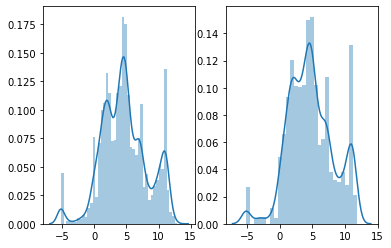

In [25]:
# split into testing & training data
train,test = train_test_split(flat_arr,shuffle=False)

# transform training data & save lambda value
train_data,fitted_lambda = stats.boxcox(train)

# use lambda value to transform test data
test_data = stats.boxcox(test, fitted_lambda)

fig, ax=plt.subplots(1,2)
sns.distplot(train_data, ax=ax[0])
sns.distplot(test_data, ax=ax[1])

Below I'll do a graphical representation of heteroscedasticity/ homoscedasticity

In [26]:
fe_res_resids = fe_res.predict().fitted_values
fe_res_PAnelOLS = fe_res.resids

In [27]:
import matplotlib.pyplot as plt

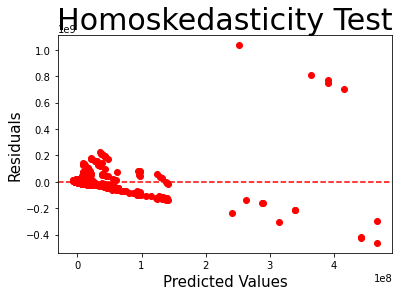

In [28]:
fig, ax = plt.subplots()
ax.scatter(fe_res_resids, fe_res_PAnelOLS, color = 'red')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

Autocorrelation cherck is the next step

In [29]:
PanelOLSdataset = pd.concat([df[['Population','Adult Mortality','infant deaths','GDP','percentage expenditure','Alcohol']], fe_res_PAnelOLS], axis=1)

In [30]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(PanelOLSdataset['residual']) 
print(durbin_watson_test_results)

1.3346890188578144


Check number of Developing and Developed countries

In [31]:
len(df[df['Status'] == 'Developing'])

2426

In [32]:
len(df[df['Status'] != 'Developing'])

512

Below is my attempt to calculate Hausman effect in Python, but I opted for Stata as met major difficulties here

import numpy.linalg as la
from scipy import stats
import numpy as np
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 

    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval
hausman_results = hausman(fe_res, re_res) 
print('chi-Squared:' + str(hausman_results[0]))
print('degrees of freedom:' + str(hausman_results[1]))
print('p-Value:' + str(hausman_results[2]))

Below I'll implement logarithm on Population as it has too big number compared with other figures and it distorts our data

In [33]:
log_pop = np.log(df['Population'])
log_pop

Year            
2015-01-01  0       17.334091
2014-01-01  1       12.699494
2013-01-01  2       17.272826
2012-01-01  3       15.123021
2011-01-01  4       14.906964
2010-01-01  5       14.874400
2009-01-01  6       12.557894
2008-01-01  7       14.819604
2007-01-01  8       17.097053
2006-01-01  9       14.766916
2005-01-01  10      12.459932
2004-01-01  11      16.998510
2003-01-01  12      14.676226
2002-01-01  13      16.905640
2001-01-01  14      14.902881
2000-01-01  15      12.590505
2015-01-01  16      10.270662
2014-01-01  17      12.573884
2013-01-01  18      12.576228
2012-01-01  19       7.986505
2011-01-01  20      12.595391
2010-01-01  21      12.582181
2009-01-01  22      14.889666
2008-01-01  23      14.896405
2007-01-01  24      10.299475
2006-01-01  25      14.911635
2005-01-01  26      12.649113
2004-01-01  27      12.697529
2003-01-01  28      12.735571
2002-01-01  29       8.163656
2001-01-01  30      10.496068
2000-01-01  31      10.569443
2015-01-01  32      17.

In [34]:
temp = pd.concat([df[['Adult Mortality','infant deaths','GDP','percentage expenditure','Alcohol','Schooling','Life expectancy ']], log_pop], axis=1)

In [35]:
from linearmodels import PanelOLS
fe_mod1 = PanelOLS(log_pop,sm.add_constant(df[['Adult Mortality','infant deaths','GDP','Schooling','percentage expenditure','Life expectancy ','Alcohol']]), entity_effects=True)
fe_res1 = fe_mod1.fit(cov_type='clustered', cluster_entity=True)
print(fe_res1)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Population   R-squared:                        0.0726
Estimator:                   PanelOLS   R-squared (Between):              0.1180
No. Observations:                2938   R-squared (Within):               0.0726
Date:                Wed, Jan 20 2021   R-squared (Overall):              0.0728
Time:                        07:50:19   Log-likelihood                   -6814.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      32.594
Entities:                          16   P-value                           0.0000
Avg Obs:                       183.62   Distribution:                  F(7,2915)
Min Obs:                       183.00                                           
Max Obs:                       193.00   F-statistic (robust):             41.930
                            

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(temp)

variables        VIF
0         Adult Mortality   3.054096
1           infant deaths   1.157907
2                     GDP   6.729800
3  percentage expenditure   5.641484
4                 Alcohol   3.263987
5               Schooling  33.873262
6        Life expectancy   56.868288
7              Population  29.319381

In [37]:
temp = pd.concat([df[['Adult Mortality','infant deaths','GDP','percentage expenditure','Alcohol']], log_pop], axis=1) 

In [38]:
temp

Adult Mortality  infant deaths            GDP  \
Year                                                             
2015-01-01 0          263.000000             62     584.259210   
2014-01-01 1          271.000000             64     612.696514   
2013-01-01 2          268.000000             66     631.744976   
2012-01-01 3          272.000000             69     669.959000   
2011-01-01 4          275.000000             71      63.537231   
2010-01-01 5          279.000000             74     553.328940   
2009-01-01 6          281.000000             77     445.893298   
2008-01-01 7          287.000000             80     373.361116   
2007-01-01 8          295.000000             82     369.835796   
2006-01-01 9          295.000000             84     272.563770   
2005-01-01 10         291.000000             85      25.294130   
2004-01-01 11         293.000000             87     219.141353   
2003-01-01 12         295.000000             87     198.728544   
2002-01-01 13           3.000000             88     187.845950   
2001-01-01 14         316.000000             88     117.496980   
2000-01-01 15         321.000000             88     114.560000   
2015-01-01 16          74.000000              0    3954.227830   
2014-01-01 17           8.000000              0    4575.763787   
2013-01-01 18          84.000000              0    4414.723140   
2012-01-01 19          86.000000              0    4247.614380   
2011-01-01 20          88.000000              0    4437.178680   
2010-01-01 21          91.000000              1     494.358832   
2009-01-01 22          91.000000              1    4114.136545   
2008-01-01 23           1.000000              1     437.539647   
2007-01-01 24           9.000000              1     363.136850   
2006-01-01 25          99.000000              1      35.129300   
2005-01-01 26          15.000000              1     279.142931   
2004-01-01 27          17.000000              1    2416.588235   
2003-01-01 28          18.000000              1     189.681557   
2002-01-01 29          15.000000              1    1453.642777   
2001-01-01 30          14.000000              1    1326.973390   
2000-01-01 31          11.000000              1    1175.788981   
2015-01-01 32          19.000000             21    4132.762920   
2014-01-01 33          11.000000             21     547.851700   
2013-01-01 34         112.000000             21    5471.866766   
2012-01-01 35         113.000000             21    5564.825660   
2011-01-01 36         116.000000             21    5432.252300   
2010-01-01 37         119.000000             21    4463.394675   
2009-01-01 38         123.000000             20    3868.831230   
2008-01-01 39         126.000000             20     495.254866   
2007-01-01 40         129.000000             20    3935.183343   
2006-01-01 41         132.000000             20    3464.617900   
2005-01-01 42         136.000000             19      31.122378   
2004-01-01 43          14.000000             19    2598.982300   
2003-01-01 44         146.000000             20     294.335560   
2002-01-01 45         145.000000             20    1774.336730   
2001-01-01 46         145.000000             20    1732.857979   
2000-01-01 47         145.000000             21    1757.177970   
2015-01-01 48         335.000000             66    3695.793748   
2014-01-01 49         348.000000             67     479.312240   
2013-01-01 50         355.000000             69     484.616884   
2012-01-01 51         358.000000             72    4598.249988   
2011-01-01 52         361.000000             75    4299.128890   
2010-01-01 53         365.000000             78    3529.534820   
2009-01-01 54         369.000000             81    3347.844850   
2008-01-01 55         371.000000             84    3868.578883   
2007-01-01 56         375.000000             87    2878.837144   
2006-01-01 57         381.000000             90     262.415149   
2005-01-01 58         382.000000             92    1443.9

In [39]:
fe_res_resids1 = fe_res1.predict().fitted_values
fe_res_PAnelOLS1 = fe_res1.resids

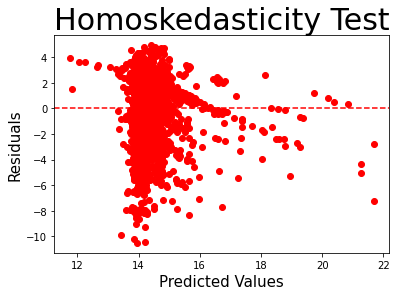

In [40]:
fig, ax = plt.subplots()
ax.scatter(fe_res_resids1, fe_res_PAnelOLS1, color = 'red')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [41]:
PanelOLSdataset1 = pd.concat([temp, fe_res_PAnelOLS1], axis=1)

In [42]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(PanelOLSdataset1['residual']) 
print(durbin_watson_test_results)

0.8798048321845205
